In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [13]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()


In [14]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [15]:
class_names=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog","horse", "ship", "truck"]


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))
model.add(Dropout(0.2))


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,578 (662.41 KB)

 Trainable params: 169,578 (662.41 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
callbacks=[EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)]

In [22]:
history=model.fit(
    x_train,y_train,
    validation_split=0.2,
    batch_size=32,
    verbose=1,
    callbacks=callbacks,
    epochs=5
)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 52ms/step - accuracy: 0.0998 - loss: nan - val_accuracy: 0.1014 - val_loss: nan
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.1035 - loss: nan - val_accuracy: 0.1014 - val_loss: nan
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.0986 - loss: nan - val_accuracy: 0.1014 - val_loss: nan
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 49ms/step - accuracy: 0.0979 - loss: nan - val_accuracy: 0.1014 - val_loss: nan
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 49ms/step - accuracy: 0.0976 - loss: nan - val_accuracy: 0.1014 - val_loss: nan


In [25]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.1001 - loss: nan
0.10000000149011612


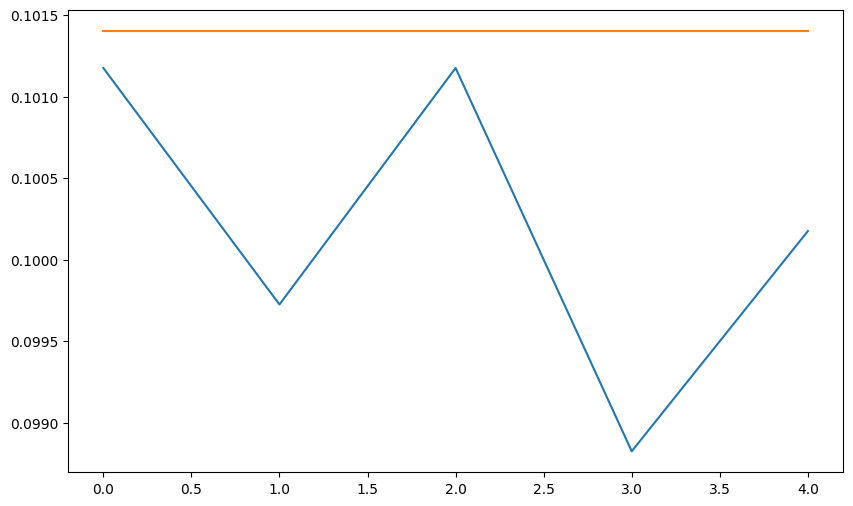

In [26]:
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
predicted class: airplane


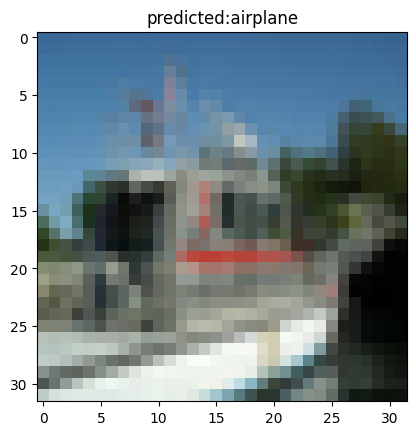

In [27]:
index=600
sample=x_test[index].reshape(1,32,32,3)
prediction=model.predict(sample)
predicted_class=np.argmax(prediction)
print("predicted class:",class_names[predicted_class])
plt.imshow(x_test[index])
plt.title(f"predicted:{class_names[predicted_class]}")
plt.show()